In [265]:
import pandas as pd
from pandas import DataFrame, read_csv
df = pd.read_excel (r'movie_metadata.xls') #for an earlier version of Excel, you may need to use the file extension of 'xls'
print(df.columns)
print (df.head(6))

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_movie_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   
5  Color     Andrew Stanton

In [27]:
test_shape = df.shape
print(test_shape)

(5043, 28)


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_movie_link             5043 non-null object
num_user_for_reviews         5022 non-n

In [356]:
df = df[['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_movie_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_score', 'aspect_ratio', 'movie_facebook_likes', 'gross']]

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

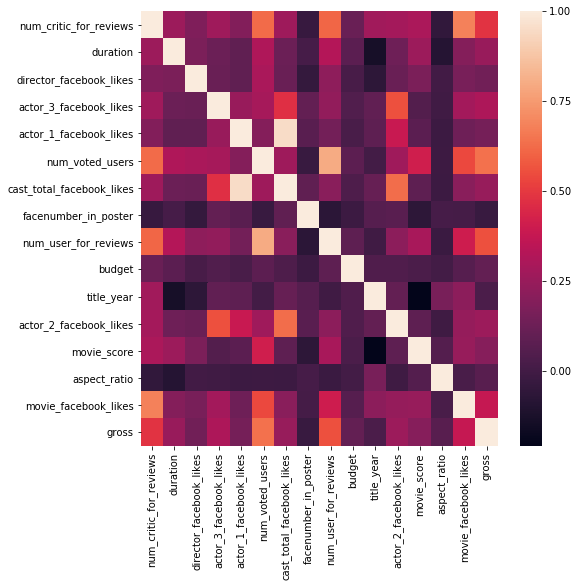

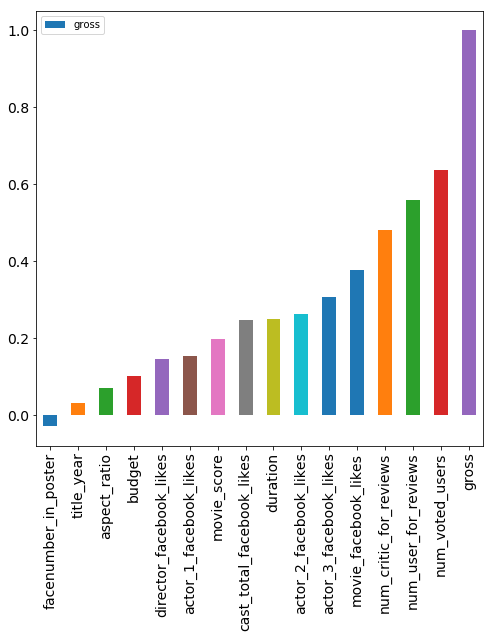

In [389]:
plt.figure(figsize=(8,8))
corr=df.corr()
sns.heatmap(corr)
df_corr_gross=df.corr().tail(1).T
df_corr_gross.sort_values(by='gross',inplace=True)

#df_corr_SalePrice.plot(kind='bar',y='SalePrice',figsize=(14,8),fontsize=14)

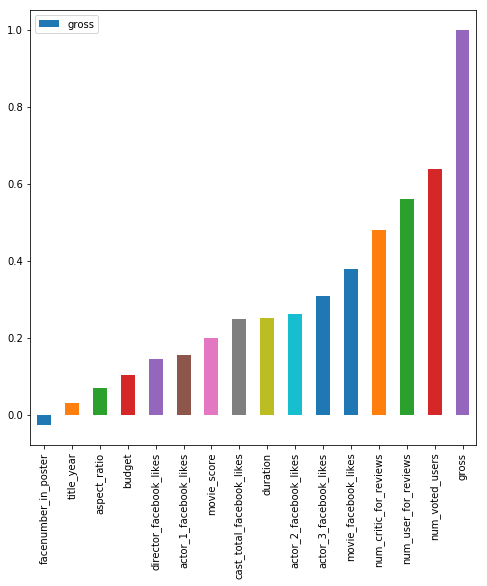

In [392]:
df_corr_gross.plot(kind='bar',y='gross',figsize=(8,8),fontsize=10)

In [360]:
df["gross"]=df["gross"]/1000000

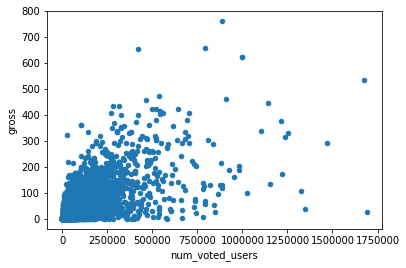

In [361]:
df.plot(kind='scatter',x='num_voted_users',y="gross")

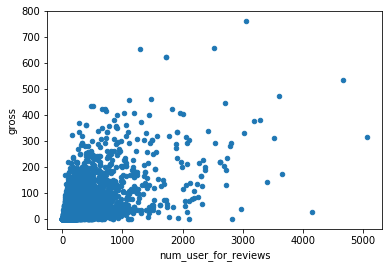

In [394]:
df.plot(kind='scatter',x='num_user_for_reviews',y="gross")

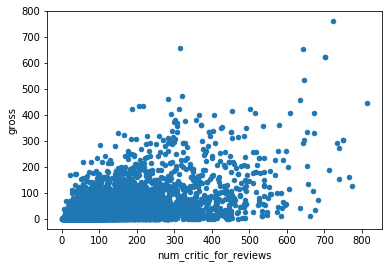

In [363]:
df.plot(kind='scatter',x='num_critic_for_reviews',y="gross")



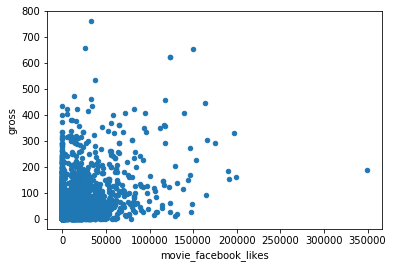

In [364]:
df.plot(kind='scatter',x='movie_facebook_likes',y="gross")

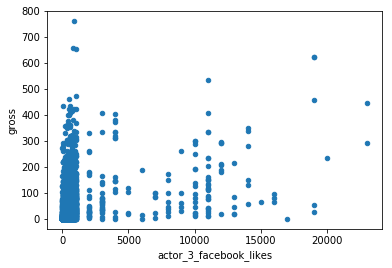

In [365]:
df.plot(kind='scatter',x='actor_3_facebook_likes',y="gross")

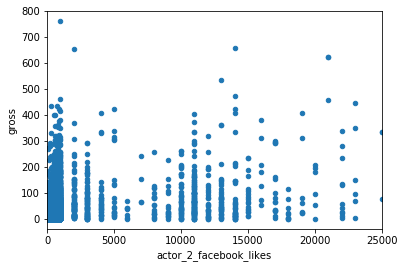

In [366]:
df.plot(kind='scatter',x='actor_2_facebook_likes',y="gross",xlim=[0,25000])

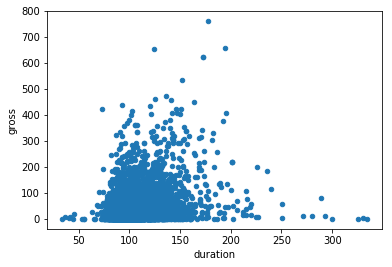

In [367]:
df.plot(kind='scatter',x='duration',y="gross")

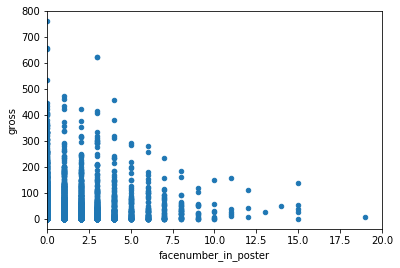

In [368]:

var = 'facenumber_in_poster'
data = pd.concat([df['gross'], df[var]], axis=1)
data.plot.scatter(x=var, y='gross',xlim=[0,20]);




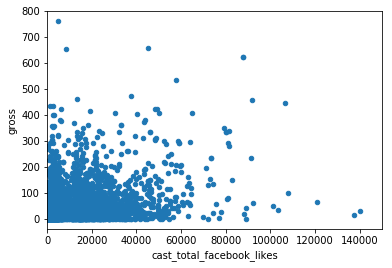

In [369]:
#cast_total_facebook_likes

var = 'cast_total_facebook_likes'
data = pd.concat([df['gross'], df[var]], axis=1)
data.plot.scatter(x=var, y='gross',xlim=[0,150000]);


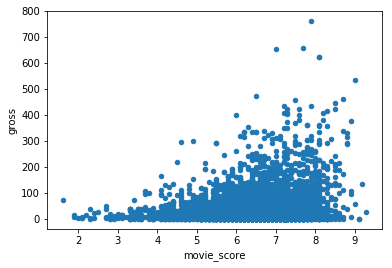

In [370]:

var = 'movie_score'
data = pd.concat([df['gross'], df[var]], axis=1)
data.plot.scatter(x=var, y='gross');

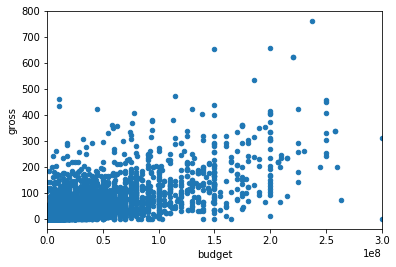

In [371]:

var = 'budget'
data = pd.concat([df['gross'], df[var]], axis=1)
data.plot.scatter(x=var, y='gross',xlim=[0,300000000]);

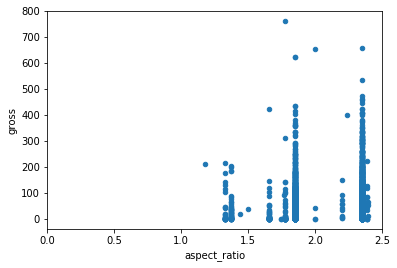

In [372]:

var = 'aspect_ratio'
data = pd.concat([df['gross'], df[var]], axis=1)
data.plot.scatter(x=var, y='gross',xlim=[0,2.5]);

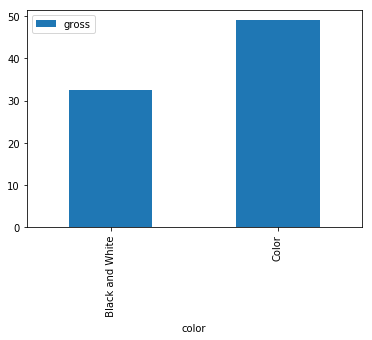

In [373]:
pclass_pivot = df.pivot_table(index="color",values="gross")
pclass_pivot
pclass_pivot.plot.bar()
plt.show()

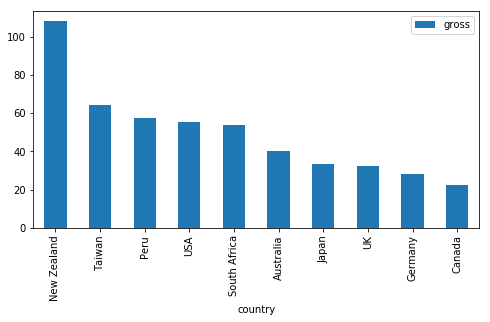

In [414]:
pclass_pivot = df.pivot_table(index="country",values="gross")

pclass_pivot=pclass_pivot.sort_values(by='gross', ascending=False)[:10]

pclass_pivot.plot.bar(figsize=(8,4))
plt.show()

<Figure size 1296x1296 with 0 Axes>

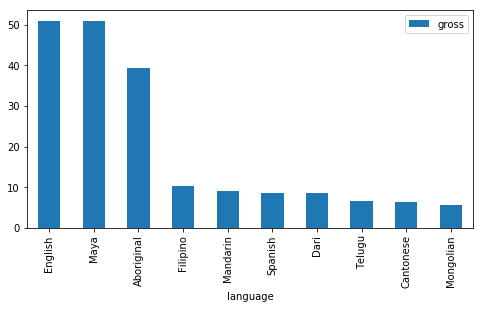

In [413]:
plt.figure(figsize=(18,18))
pclass_pivot = df.pivot_table(index="language",values="gross",)

pclass_pivot=pclass_pivot.sort_values(by='gross', ascending=False)[:10]
 
pclass_pivot.plot.bar(figsize=(8,4))
plt.show()

<Figure size 576x576 with 0 Axes>

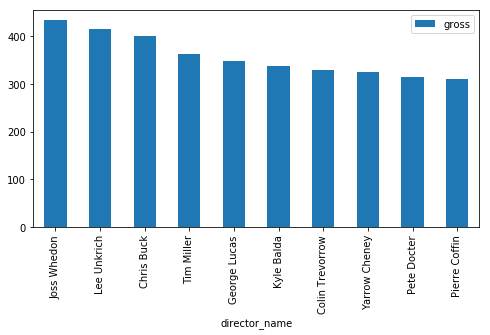

In [412]:
plt.figure(figsize=(8,8))
pclass_pivot = df.pivot_table(index="director_name",values="gross",)

pclass_pivot=pclass_pivot.sort_values(by='gross', ascending=False)[:10]
pclass_pivot
pclass_pivot.plot.bar(figsize=(8,4))
plt.show()

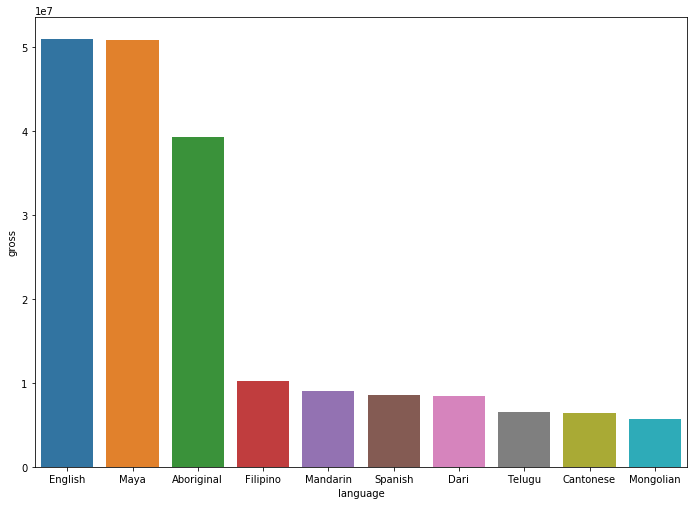

In [347]:
cityPerc = df[["language", "gross"]].groupby(['language'],as_index=False).mean()
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
newDF = cityPerc.sort_values(["gross"],ascending= False)
sns.barplot(x='language', y='gross', data=newDF.head(10),ax=ax)


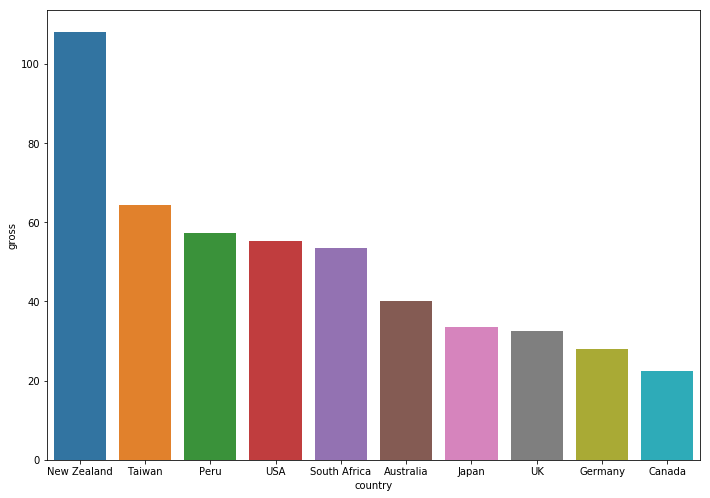

In [376]:
cityPerc = df[["country", "gross"]].groupby(['country'],as_index=False).mean()
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
newDF = cityPerc.sort_values(["gross"],ascending= False)
sns.barplot(x='country', y='gross', data=newDF.head(10),ax=ax)

In [377]:
from collections import Counter
import numpy as np
gross_not_null_df = df[df['gross'].notnull()]
print(gross_not_null_df.shape)
genres_map = {}
print("aa|bb".split("|"))
genres_list = []
gross_is_null = 0
for index,row in gross_not_null_df.iterrows():
    items = str(row['genres']).split("|")
    #print(items)
    for item in items:
        if(item not in genres_map):genres_map[item] = 0
        genres_map[item] = genres_map[item] + int(row['gross'])
    genres_list.extend(items)
counter = Counter(genres_list)
print(gross_is_null)
print(genres_map)

#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)

#newDF = cityPerc.sort_values(["gross"],ascending= False)
print(genres_map.keys())
print(genres_map.values())

#sns.barplot(x=genres_map.keys(), y=genres_map.values())


(4159, 28)
['aa', 'bb']
0
{'Action': 74727, 'Adventure': 79453, 'Fantasy': 44880, 'Sci-Fi': 41633, 'Thriller': 54396, 'Romance': 39490, 'Animation': 21728, 'Comedy': 76742, 'Family': 41847, 'Musical': 5799, 'Mystery': 17947, 'Western': 2607, 'Drama': 72991, 'History': 5633, 'Sport': 6873, 'Crime': 27948, 'Horror': 13622, 'War': 6478, 'Biography': 8885, 'Music': 6400, 'Documentary': 1070, 'News': 14, 'Short': 7, 'Film-Noir': 0}
dict_keys(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Documentary', 'News', 'Short', 'Film-Noir'])
dict_values([74727, 79453, 44880, 41633, 54396, 39490, 21728, 76742, 41847, 5799, 17947, 2607, 72991, 5633, 6873, 27948, 13622, 6478, 8885, 6400, 1070, 14, 7, 0])


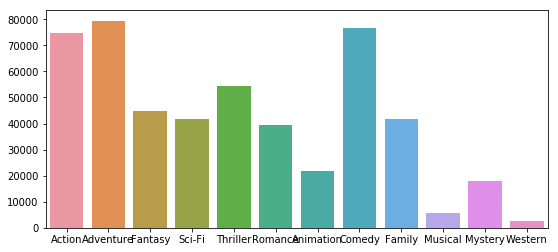

In [421]:
plt.figure(figsize=(9,4))
ax = sns.barplot(x=list(genres_map.keys())[:12],y=list(genres_map.values())[:12])


<Figure size 288x288 with 0 Axes>

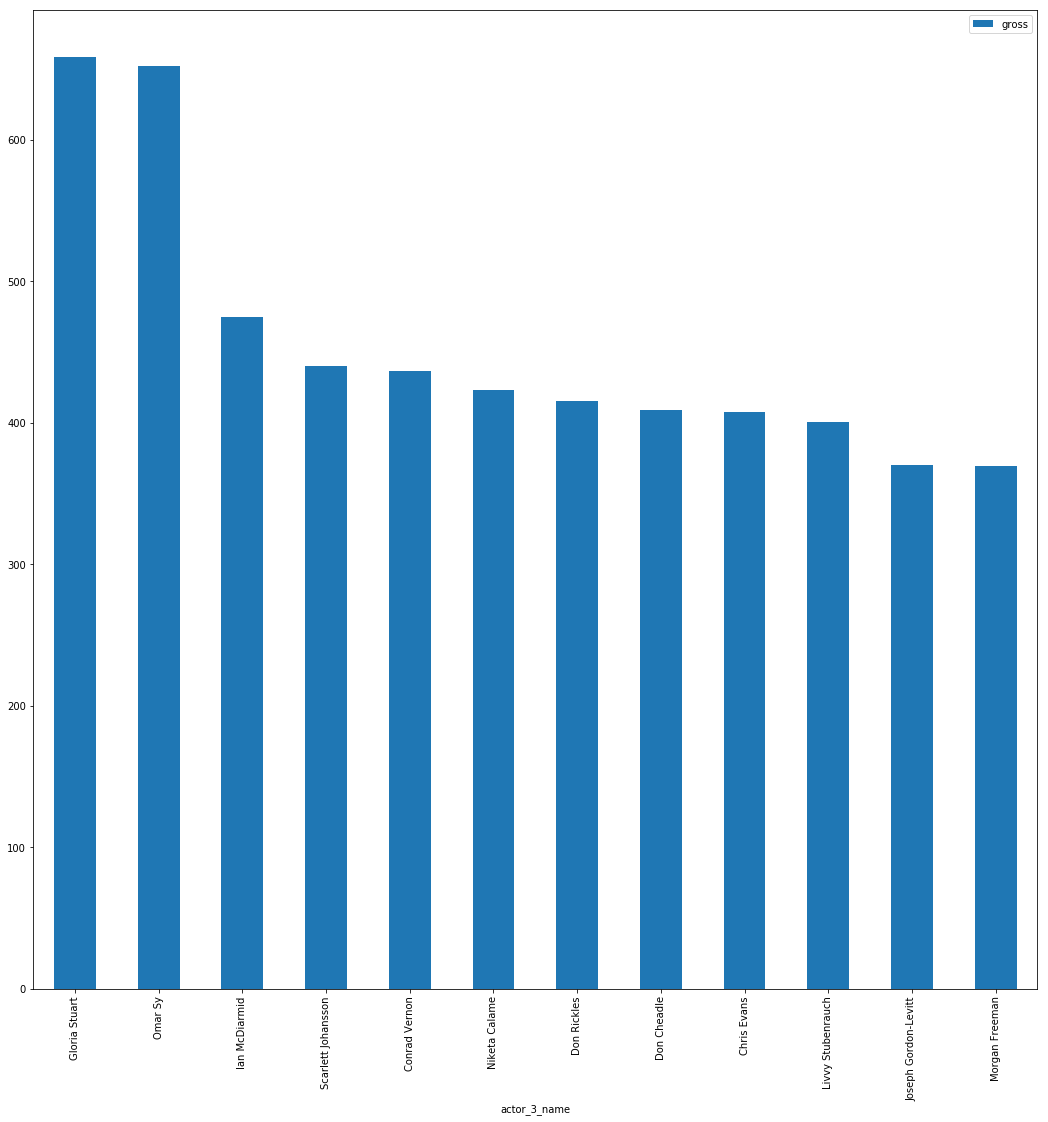

In [404]:
plt.figure(figsize=(4,4))
pclass_pivot = df.pivot_table(index="actor_3_name",values="gross",)

pclass_pivot=pclass_pivot.sort_values(by='gross', ascending=False)[:12]
pclass_pivot
pclass_pivot.plot.bar(figsize=(18,18))
plt.show()